In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import cv2
import zipfile
import shutil
import os
import glob
import scipy.stats as stats

#matplot 한글폰트 설정
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:\Windows\Fonts\GULIM.TTC").get_name()
plt.rc("font", family = font_name)

import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"]= False

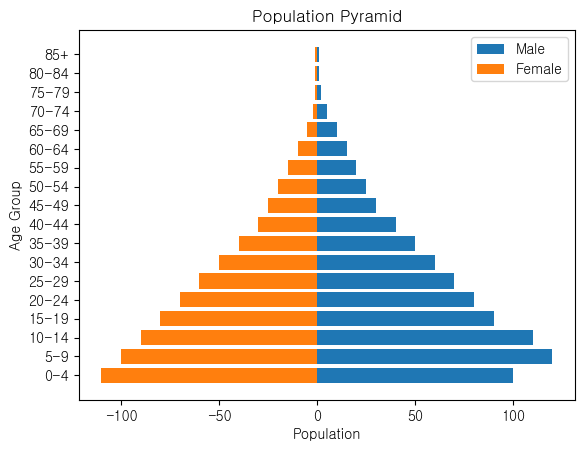

In [2]:
import matplotlib.pyplot as plt

# 데이터 설정
age_groups = ['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85+']
male_population = [100, 120, 110, 90, 80, 70, 60, 50, 40, 30, 25, 20, 15, 10, 5, 2, 1, 1]
female_population = [110, 100, 90, 80, 70, 60, 50, 40, 30, 25, 20, 15, 10, 5, 2, 1, 1, 1]

# 그래프 그리기
fig, ax = plt.subplots()

# 남성 인구 그리기
ax.barh(age_groups, male_population, label='Male')

# 여성 인구 그리기
ax.barh(age_groups, [-x for x in female_population], label='Female')

# 축 설정
ax.set_xlabel('Population')
ax.set_ylabel('Age Group')
ax.set_title('Population Pyramid')
ax.legend()

# 그래프 보여주기
plt.show()


##### 토마토  column feature 양육 기준 정보
## - Reference 1: https://samwha27.com/entry/%EC%8A%A4%EB%A7%88%ED%8A%B8%ED%8C%9C-%EA%B8%B0%EC%B4%88%EA%B5%90%EC%9C%A1-%EC%96%91%EC%88%98%EB%B6%84-%EA%B4%80%EB%A6%AC%EB%A5%BC-%EB%B0%B0%EC%9B%8C%EB%B3%B4%EC%9E%90
## - Reference 2: https://smartfarm.rda.go.kr/dtsv/grwhct_pub.do
- J/Day : 600 ~ 1300
- 평균온도 :  17.4 ~    15 ~ 30도로 유지해야함
- EC 급액 : 2.5 ~ 3.5
- EC 배액 : 3.5 ~ 5.0
- pH 급액 : 5.2 ~ 5.9 or  ## 6.0 ~ 6.5 가 적절하다고 여김 
- pH 배액 : 5.0 ~ 7.0
- 이산화탄소농도 : 350 ~ 600
- 온도토양 : 15 ~ 25
- 온도급액 : 15 ~ 30
- 온도배액 : 15 ~ 30


In [9]:
tom_path = "C:/seokwonna/pythonwork/AI/FinalProject/스마트팜 데이터마트"
df_growth = pd.read_excel(tom_path + "/토마토_생육정보_일별_PF_0020725_01_2020_대규모.xlsx",
            index_col=0,header=1, sheet_name = 0)
df_growth

c:\Users\acorn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,주차,생장길이(cm),화방높이(cm),줄기굵기(mm),엽장(cm),엽폭(cm),엽수(개),개화군(점),착과군(점),열매수(개),최종화방번호(번)
조사일,,,,,,,,,,,
2021-01-07,4,514.0,178.0,7.0,339.0,326.0,5.0,0.0,0.0,0.0,1.0
2021-01-13,5,157.0,288.0,8.0,354.0,388.0,6.0,1.0,0.0,1.0,1.0
2021-01-20,6,213.0,316.0,11.0,423.0,450.0,10.0,1.0,1.0,3.0,3.0
2021-01-29,7,309.0,293.0,12.0,455.0,450.0,11.0,3.0,1.0,3.0,3.0
2021-02-03,8,196.0,326.0,12.0,485.0,448.0,11.0,3.0,2.0,8.0,3.0
2021-02-09,9,290.0,188.0,9.0,450.0,355.0,11.0,4.0,3.0,11.0,5.0
2021-02-18,10,370.0,345.0,10.0,475.0,500.0,13.0,5.0,4.0,14.0,6.0
2021-02-23,11,190.0,276.0,11.0,456.0,466.0,12.0,6.0,5.0,19.0,6.0
2021-03-03,12,295.0,320.0,12.0,443.0,498.0,17.0,6.0,5.0,18.0,7.0


In [12]:
df_growth.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25 entries, 2021-01-07 to 2021-06-22
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   주차         25 non-null     int64  
 1   생장길이(cm)   25 non-null     float64
 2   화방높이(cm)   25 non-null     float64
 3   줄기굵기(mm)   25 non-null     float64
 4   엽장(cm)     25 non-null     float64
 5   엽폭(cm)     25 non-null     float64
 6   엽수(개)      25 non-null     float64
 7   개화군(점)     25 non-null     float64
 8   착과군(점)     25 non-null     float64
 9   열매수(개)     25 non-null     float64
 10  최종화방번호(번)  25 non-null     float64
dtypes: float64(10), int64(1)
memory usage: 2.3+ KB


<AxesSubplot:>

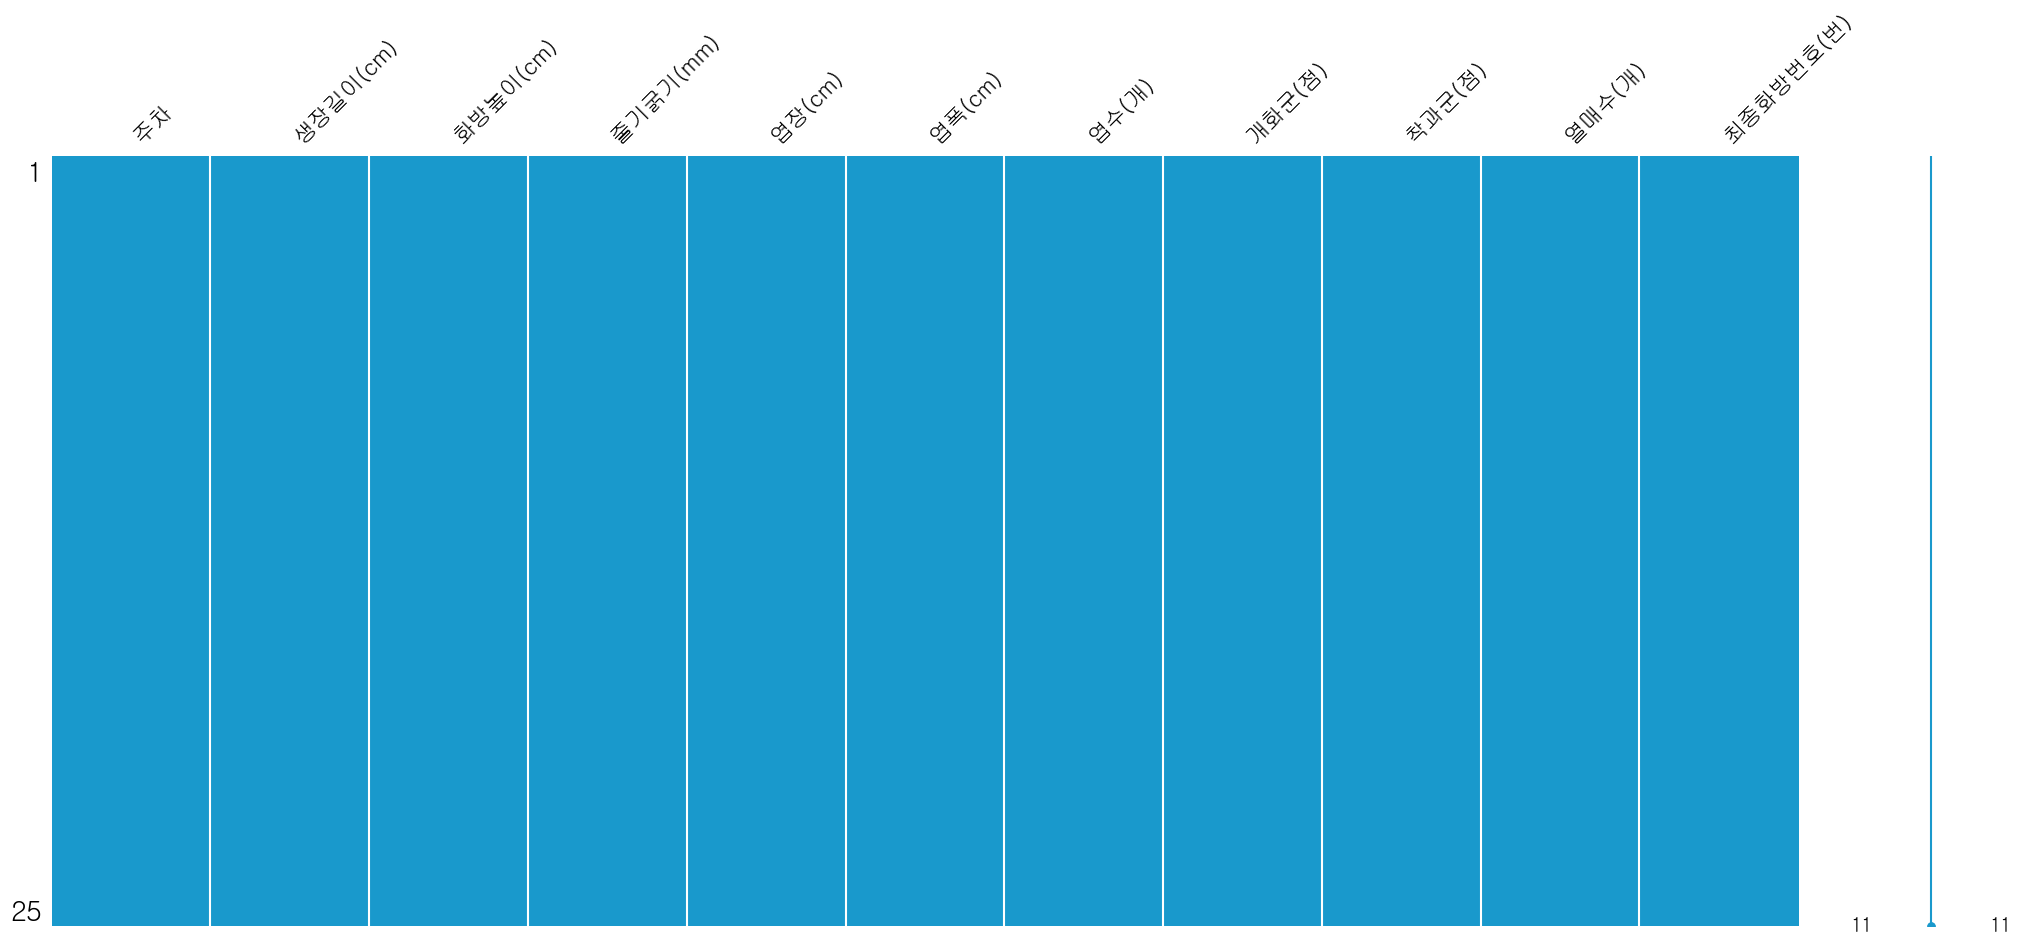

In [14]:
import missingno as msno
msno.matrix(df=df_growth.iloc[:, :], color=(0.1, 0.6, 0.8))


In [11]:
df_env = pd.read_excel(tom_path + "/토마토_환경정보_시간별_PF_0020725_01_2020_대규모.xlsx",
            index_col=0,header=1, sheet_name = 0)
df_env

c:\Users\acorn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,배지무게(kg),(양액)압/출력(%),내부CO2(ppm),배지온도(도),이슬점온도(도),(양액)공급EC(dS/m),토양EC(dS/m),(양액)배액EC(dS/m),외부습도(%),내부습도(%),...,외부강우(mm),강우감지,(양액)총급액(ℓ),(양액)총배액(ℓ),일사량(W/m-2·s),외부온도(도),내부온도(도),지온(도),외부풍향(도),외부풍속(m/s)
수집일시,,,,,,,,,,,,,,,,,,,,,
2020-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-30 19:00:00,NaN,NaN,471.0,NaN,NaN,NaN,NaN,NaN,NaN,33.0,...,NaN,0.0,NaN,NaN,NaN,27.0,17.0,26.0,0.0,0.0
2021-06-30 20:00:00,NaN,NaN,495.0,NaN,NaN,NaN,NaN,NaN,NaN,32.0,...,NaN,0.0,NaN,NaN,0.0,26.0,17.0,25.0,0.0,0.0
2021-06-30 21:00:00,NaN,NaN,479.0,NaN,NaN,NaN,NaN,NaN,NaN,33.0,...,NaN,0.0,NaN,NaN,0.0,25.0,16.0,NaN,NaN,0.0


In [13]:
df_env.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4330 entries, 2020-12-31 00:00:00 to 2021-06-30 23:00:00
Data columns (total 28 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   배지무게(kg)        0 non-null      float64
 1   (양액)압/출력(%)     0 non-null      float64
 2   내부CO2(ppm)      3193 non-null   float64
 3   배지온도(도)         0 non-null      float64
 4   이슬점온도(도)        0 non-null      float64
 5   (양액)공급EC(dS/m)  0 non-null      float64
 6   토양EC(dS/m)      0 non-null      float64
 7   (양액)배액EC(dS/m)  0 non-null      float64
 8   외부습도(%)         0 non-null      float64
 9   내부습도(%)         4330 non-null   float64
 10  지습(%)           2547 non-null   float64
 11  광량(μmol/m-2·s)  0 non-null      float64
 12  내부조도(lux)       0 non-null      float64
 13  (양액)공급량(cc)     0 non-null      float64
 14  (양액)배액량(cc)     0 non-null      float64
 15  (양액)공급PH(ph)    0 non-null      float64
 16  토양PH(ph)        0 non-null      float64
 17  (양액)배

<AxesSubplot:>

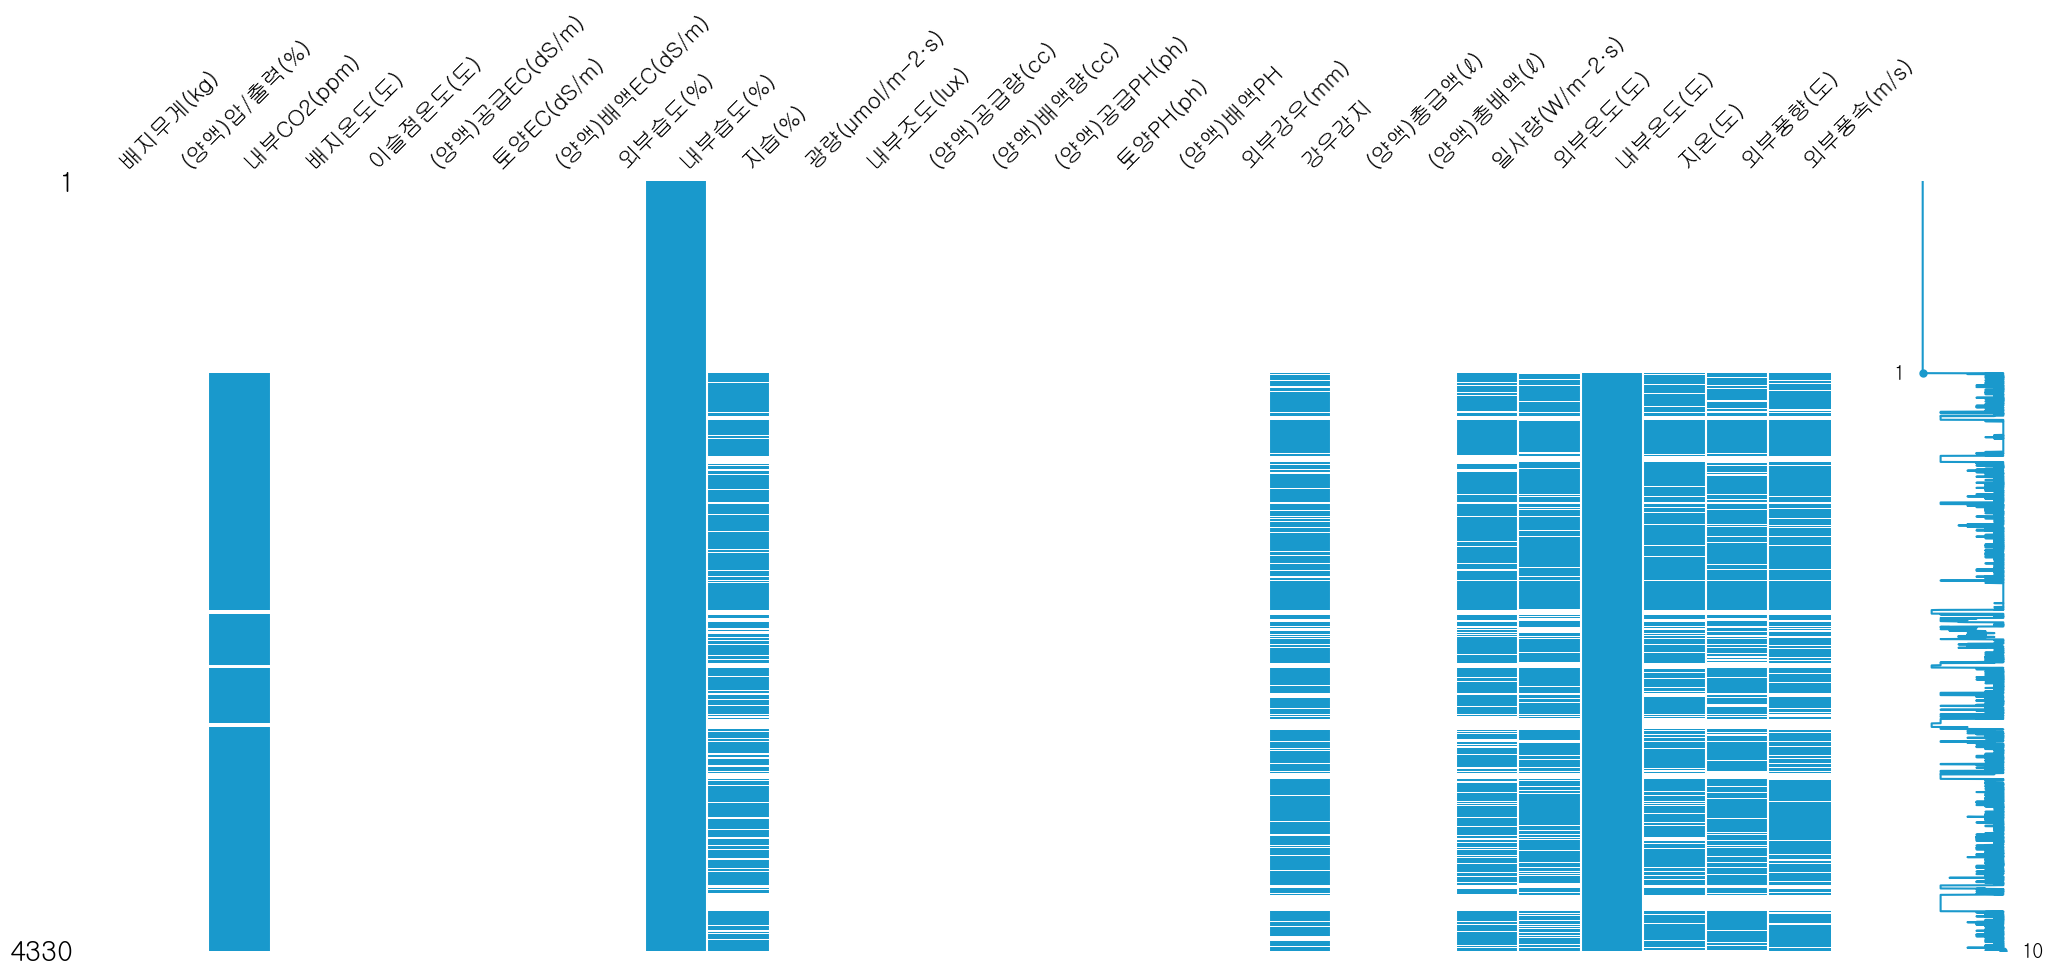

In [15]:
msno.matrix(df=df_env.iloc[:, :], color=(0.1, 0.6, 0.8))


c:\Users\acorn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<AxesSubplot:>

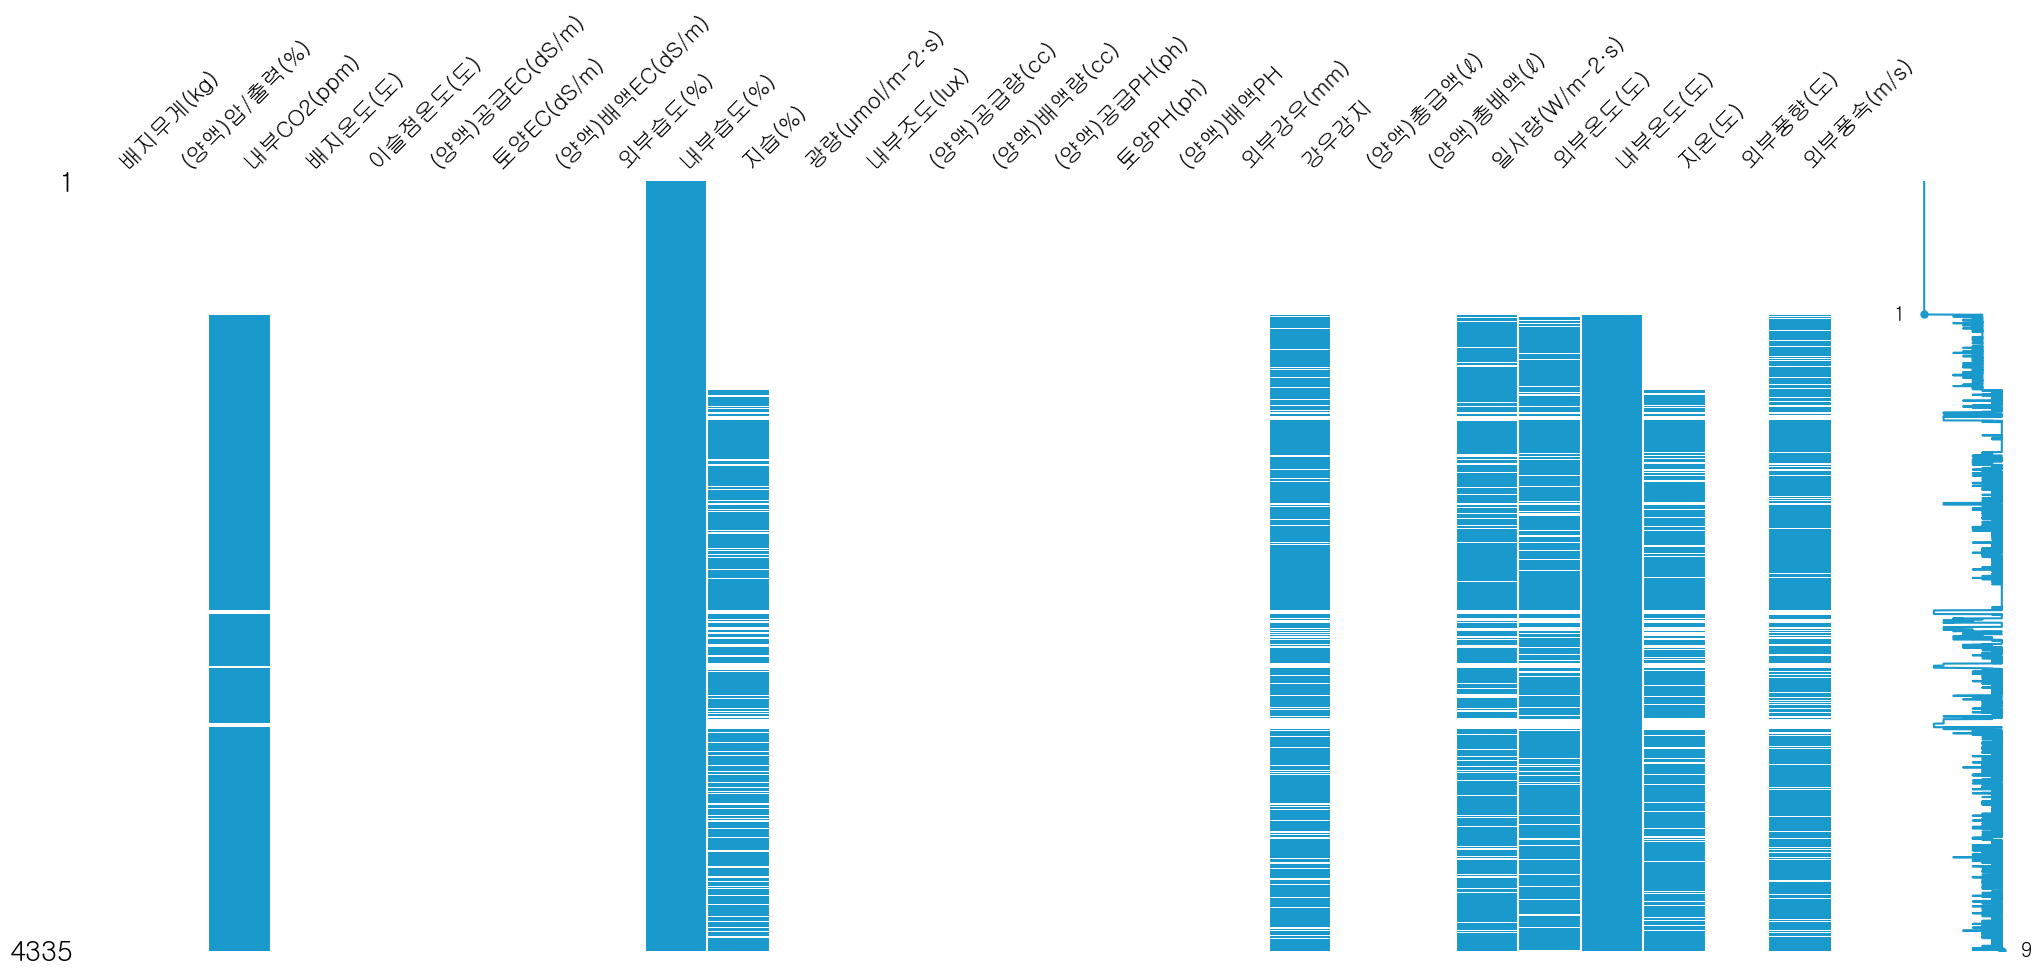

In [16]:
df_env1 = pd.read_excel(tom_path + "/토마토_환경정보_시간별_PF_0000806_01_2020_대규모.xlsx",
            index_col=0,header=1, sheet_name = 0)
msno.matrix(df=df_env1.iloc[:, :], color=(0.1, 0.6, 0.8))


c:\Users\acorn\anaconda3\lib\site-packages\openpyxl\styles\stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


<AxesSubplot:>

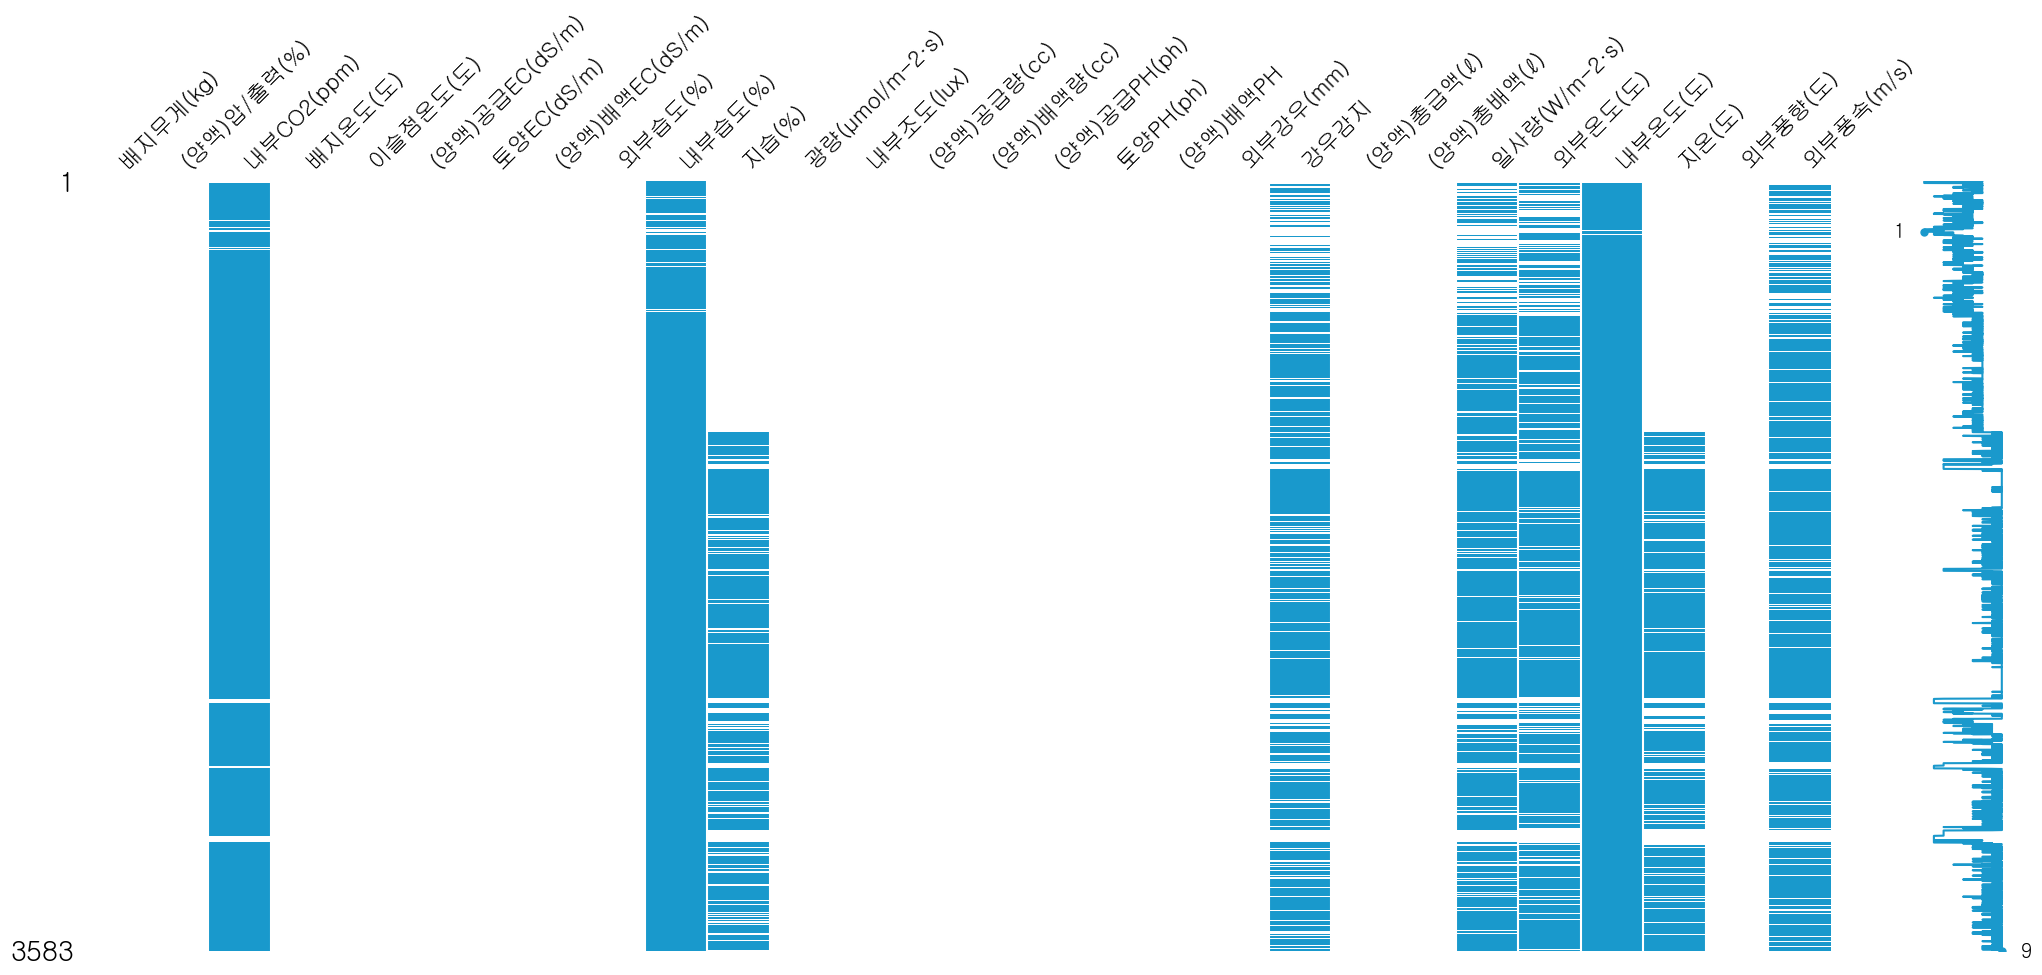

In [17]:
df_env2 = pd.read_excel(tom_path + "/토마토_환경정보_시간별_PF_0010014_01_2020_중규모.xlsx",
            index_col=0,header=1, sheet_name = 0)
msno.matrix(df=df_env2.iloc[:, :], color=(0.1, 0.6, 0.8))


In [18]:
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager


In [22]:
# 크롤링시 필요한 라이브러리 불러오기
import pandas as pd
from bs4 import BeautifulSoup
import requests
import re
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from webdriver_manager.chrome import ChromeDriverManager


# 웹드라이버 설정
options = webdriver.ChromeOptions()
options.add_experimental_option("excludeSwitches", ["enable-automation"])
options.add_experimental_option("useAutomationExtension", False)


# 페이지 url 형식에 맞게 바꾸어 주는 함수 만들기
# 입력된 수를 1, 11, 21, 31 ...만들어 주는 함수
def makePgNum(num):
    if num == 1:
        return num
    elif num == 0:
        return num + 1
    else:
        return num + 9 * (num - 1)


# 크롤링할 url 생성하는 함수 만들기(검색어, 크롤링 시작 페이지, 크롤링 종료 페이지)
def makeUrl(search, start_pg, end_pg):
    if start_pg == end_pg:
        start_page = makePgNum(start_pg)
        url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + search + "&start=" + str(
            start_page)
        print("생성url: ", url)
        return url
    else:
        urls = []
        for i in range(start_pg, end_pg + 1):
            page = makePgNum(i)
            url = "https://search.naver.com/search.naver?where=news&sm=tab_pge&query=" + \
                search + "&start=" + str(page)
            urls.append(url)
        print("생성url: ", urls)
        return urls


##########뉴스크롤링 시작###################

# 검색어 입력
search = input("검색할 키워드를 입력해주세요:")

# 검색 시작할 페이지 입력
# ex)1 =1페이지,2=2페이지...
page = int(input("\n크롤링할 시작 페이지를 입력해주세요. ex)1(숫자만입력):"))
print("\n크롤링할 시작 페이지: ", page, "페이지")
# 검색 종료할 페이지 입력
# ex)1 =1페이지,2=2페이지...
page2 = int(input("\n크롤링할 종료 페이지를 입력해주세요. ex)1(숫자만입력):"))
print("\n크롤링할 종료 페이지: ", page2, "페이지")

# naver url 생성
search_urls = makeUrl(search, page, page2)

## selenium으로 navernews만 뽑아오기##

# 버전에 상관 없이 os에 설치된 크롬 브라우저 사용
driver = webdriver.Chrome(ChromeDriverManager().install())
driver.implicitly_wait(3)

# selenium으로 검색 페이지 불러오기 #

naver_urls = []

for i in search_urls:
    driver.get(i)
    time.sleep(1)  # 대기시간 변경 가능

    # 네이버 기사 눌러서 제목 및 본문 가져오기#
    # 네이버 기사가 있는 기사 css selector 모아오기
    a = driver.find_elements(By.CSS_SELECTOR, 'a.info')

    # 위에서 생성한 css selector list 하나씩 클릭하여 본문 url얻기
    for i in a:
        i.click()

        # 현재탭에 접근
        driver.switch_to.window(driver.window_handles[1])
        time.sleep(1)  # 대기시간 변경 가능

        # 네이버 뉴스 url만 가져오기

        url = driver.current_url
        print(url)

        if "news.naver.com" in url:
            naver_urls.append(url)

        else:
            pass
        # 현재 탭 닫기
        driver.close()
        # 다시처음 탭으로 돌아가기(매우 중요!!!)
        driver.switch_to.window(driver.window_handles[0])

print(naver_urls)

###naver 기사 본문 및 제목 가져오기###

# ConnectionError방지
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) Chrome/98.0.4758.102"}

titles = []
contents = []
for i in naver_urls:
    original_html = requests.get(i, headers=headers)
    html = BeautifulSoup(original_html.text, "html.parser")
    # 검색결과확인시
    # print(html)

    # 뉴스 제목 가져오기
    title = html.select(
        "div#ct > div.media_end_head.go_trans > div.media_end_head_title > h2")
    # list합치기
    title = ''.join(str(title))
    # html태그제거
    pattern1 = '<[^>]*>'
    title = re.sub(pattern=pattern1, repl='', string=title)
    titles.append(title)

    # # 뉴스 본문 가져오기

    # content = html.select("div#dic_area")

    # # 기사 텍스트만 가져오기
    # # list합치기
    # content = ''.join(str(content))

    # # html태그제거 및 텍스트 다듬기
    # content = re.sub(pattern=pattern1, repl='', string=content)
    # pattern2 = """[\n\n\n\n\n// flash 오류를 우회하기 위한 함수 추가\nfunction _flash_removeCallback() {}"""
    # content = content.replace(pattern2, '')

    # contents.append(content)

print(titles)
# print(contents)

# 데이터프레임으로 정리(titles,url,contents)

# news_df = pd.DataFrame(
#     {'title': titles, 'link': naver_urls, 'content': contents})
news_df = pd.DataFrame(
    {'title': titles, 'link': naver_urls})

# news_df.to_csv('NaverNews_%s.csv' % search, index=False, encoding='utf-8-sig')



크롤링할 시작 페이지:  1 페이지

크롤링할 종료 페이지:  100 페이지
생성url:  ['https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=1', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=11', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=21', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=31', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=41', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=51', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=61', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=71', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=81', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=91', 'https://search.naver.com/search.naver?where=news&sm=tab_pge&query=스마트팜&start=101', 'https://search.naver.com/search.n

C:\Users\acorn\AppData\Local\Temp\ipykernel_18928\3493202845.py:68: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(ChromeDriverManager().install())


https://shindonga.donga.com/
https://n.news.naver.com/mnews/article/262/0000016640?sid=102
https://www.nocutnews.co.kr/
https://www.nocutnews.co.kr/pop/pop230626.htm
https://n.news.naver.com/mnews/article/079/0003786713?sid=102
http://www.joongdo.co.kr/web/
https://imnews.imbc.com/pc_main.html
http://www.joongdo.co.kr/web/popup1.php
https://n.news.naver.com/mnews/article/214/0001283138?sid=101
http://kr.people.com.cn/
https://www.metroseoul.co.kr/
http://www.agrinet.co.kr/
http://www.domin.co.kr/
http://www.veritas-a.com/
http://www.idaegu.com/
http://www.domin.co.kr/bannerpop/popup.html?win_popup_idxno=1943
https://www.asiatoday.co.kr/
http://www.globaledunews.co.kr/
https://news.kbs.co.kr/common/main.html
https://n.news.naver.com/mnews/article/056/0011516253?sid=101
https://www.yna.co.kr/
https://n.news.naver.com/mnews/article/001/0014036975?sid=101
http://www.shinailbo.co.kr/
http://www.knnews.co.kr/autoi/index.html
https://www.inews24.com/
https://n.news.naver.com/mnews/article/031

In [23]:
news_df



,title,link
0,[“첨단기업 + 스마트팜 + 군부대 + 세계 모자 페스티벌로 ‘상주벽해’ 이루겠다”],https://n.news.naver.com/mnews/article/262/000...
1,[제주에 태양에너지 100% 자립형 온실 스마트팜 구축],https://n.news.naver.com/mnews/article/079/000...
2,[[비즈&amp;트렌드] '사막에서 토마토를?' K-스마트팜 열풍],https://n.news.naver.com/mnews/article/214/000...
3,"[김제시, ‘지역 특화 임대형 스마트팜’ 조성 협약]",https://n.news.naver.com/mnews/article/056/001...
4,[공기정화식물을 키우는 스마트 팜 전시],https://n.news.naver.com/mnews/article/001/001...
...,...,...
238,[[취업 걱정없는 명품학교]〈373〉경기스마트고],https://n.news.naver.com/mnews/article/030/000...
239,"[TK 홍준표·이철우 ""챙겨달라"", 국힘 윤재옥 ""최선 다하겠다""]",https://n.news.naver.com/mnews/article/047/000...
240,"[경북도, 국민의힘에 '균형발전인지 예산제도' 도입 건의]",https://n.news.naver.com/mnews/article/001/001...
241,"[이철우 지사 ""국가정책수립 때 지방 고려 관점 반드시 포함돼야""]",https://n.news.naver.com/mnews/article/003/001...


In [24]:
news_df.to_csv("C:/seokwonna/pythonwork/AI/FinalProject/naver_news_smartfarm1.csv",
               encoding='utf-8-sig', index=False)